# Analysis of Loan Prosper Data
## by Sanjay

## Investigation Overview

>Analysis on various factors influencing the loan outcome status and the LoanOriginalAmount given and understanding the trends/patterns between them to derive at useful insights.

## Dataset Overview

> Dataset Information :
* The dataset chosen is Loan Data from Prosper.
* This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
* It was last updated on 03/11/2014.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

## Visualization 1 :

> Visualising the simplified loan classification based on the various loan status.

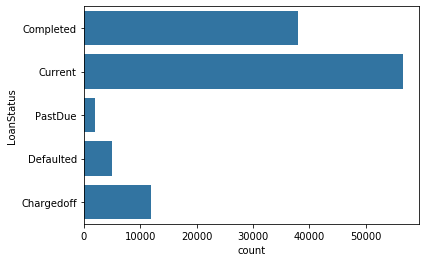

In [3]:
base_color = sb.color_palette()[0]
df.LoanStatus.replace(to_replace = ['Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)',
                                     'Past Due (91-120 days)','Past Due (>120 days)'],value = 'PastDue',inplace = True)
df = df[df.LoanStatus.isin(['Current','Completed','Defaulted','Chargedoff','PastDue'])]
sb.countplot(data = df, y = 'LoanStatus', color = base_color);

## Visualization 2 :

> Visualising the inverse relationship between LoanOriginalAmount and BorrowerRate across LoanStatus by the negative slope of the regression line.

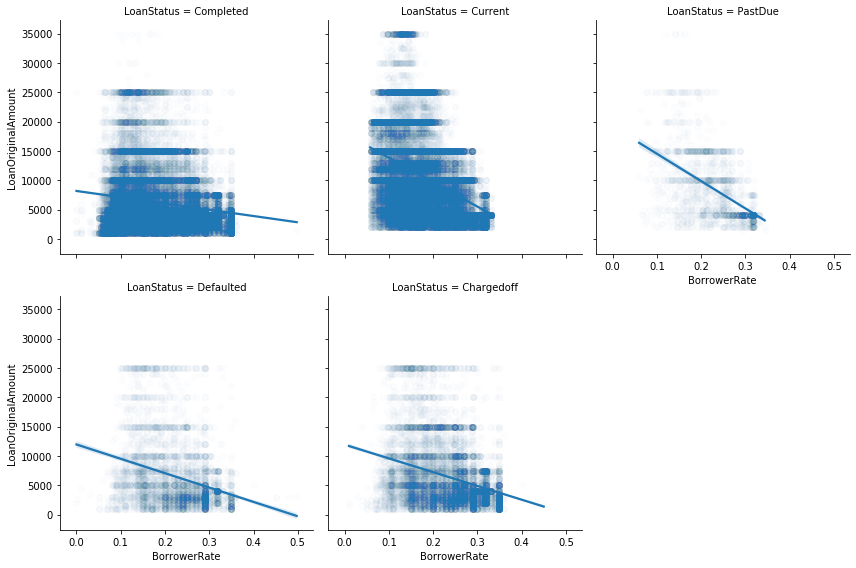

In [4]:
g = sb.FacetGrid(data = df, col = 'LoanStatus', size = 4, col_wrap = 3);
g.map(sb.regplot, 'BorrowerRate', 'LoanOriginalAmount',y_jitter = 0.04, fit_reg = True,scatter_kws = {'alpha' : 0.01});

## Visualization 3 :
> Visualising a steady increase in the loan amount granted with higher prosperity rating and by owning a home at each prosperity rating.

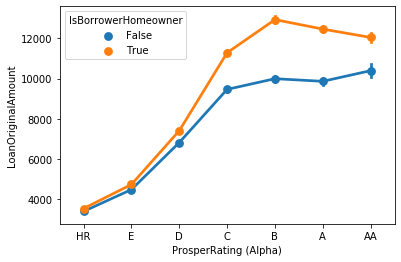

In [5]:
prosper_rating_order = ['HR','E','D','C','B','A','AA']
ordererd_prosper_rating = pd.api.types.CategoricalDtype(ordered = True,categories = prosper_rating_order)
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(ordererd_prosper_rating)
sb.pointplot(data = df, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner');